In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names)

In [ ]:
data = data.replace('?', np.nan)

data = data.dropna()

data = data.astype(float)

data = pd.get_dummies(data, columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"], drop_first=True)

data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(data.drop('target', axis=1))
interaction_term_names = poly.get_feature_names_out(data.drop('target', axis=1).columns)
interaction_df = pd.DataFrame(interaction_terms, columns=interaction_term_names)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(interaction_df)
scaled_df = pd.DataFrame(scaled_features, columns=interaction_term_names)

In [ ]:
data = pd.concat([scaled_df, data['target'].reset_index(drop=True)], axis=1)

In [ ]:
X = data.drop('target', axis=1)
y = data['target']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC Score: {roc_auc}')

Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.875
ROC-AUC Score: 0.9479166666666667


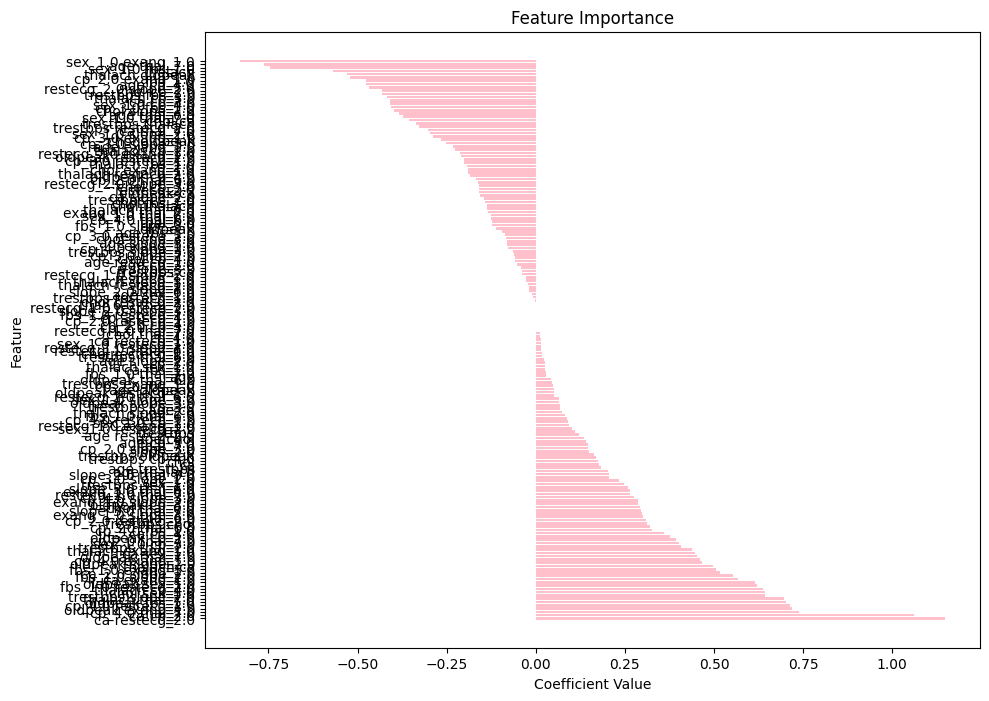

In [ ]:
import matplotlib.pyplot as plt

coefficients = model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='pink')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


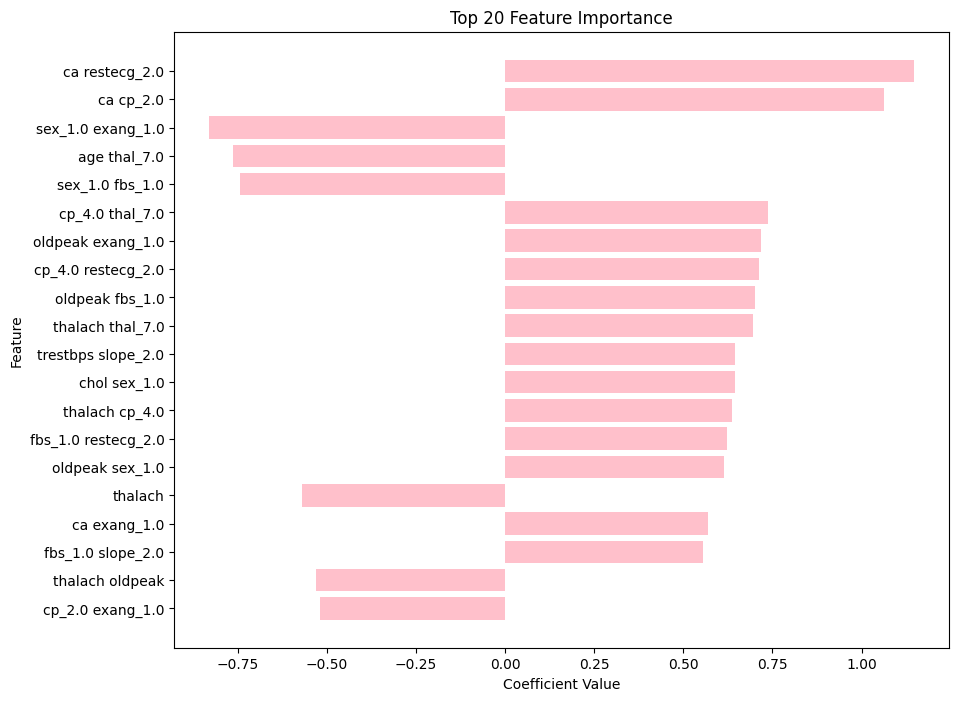

In [ ]:
# Sort the coefficients by absolute value and take the top 20
top_features = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index).head(20)

# Plot the top 20 coefficients
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='pink')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


**Interpretation**
ca restecg_2.0: Interaction between coronary arteries (ca) and resting electrocardiographic results (restecg) for a specific category (2.0) has the highest positive impact on heart disease prediction.
ca cp_2.0: Interaction between coronary arteries (ca) and chest pain type (cp) for a specific category (2.0) also shows a significant positive impact.
thalach: Maximum heart rate achieved has a negative impact, meaning higher values are associated with a lower likelihood of heart disease.